# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd

In [2]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests

url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [4]:
image_preds = pd.read_csv('image_predictions.tsv', sep='\t')
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
df_list = []
with open('tweet-json.txt', encoding='utf-8') as file:
    for f in file:
        ftxt = json.loads(f)
        tweet_id = ftxt['id']
        retweet_count = ftxt['retweet_count']
        favorite_count = ftxt['favorite_count']
        
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count':favorite_count})

tweet_json = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])        

In [7]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
tweet_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
924,755206590534418437,NaN,NaN,2016-07-19 01:04:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most inspirational stories ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755206590...,14,10,one,doggo,None,None,None
538,806620845233815552,NaN,NaN,2016-12-07 22:06:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Idk why this keeps happening. W...,7.815247e+17,4.196984e+09,2016-09-29 16:03:01 +0000,https://twitter.com/dog_rates/status/781524693...,12,10,None,None,None,None,None
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,None,None,pupper,None
1670,682406705142087680,NaN,NaN,2015-12-31 03:43:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Patrick. He's a bigass pupper. 7/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682406705...,7,10,Patrick,None,None,pupper,None
337,832397543355072512,NaN,NaN,2017-02-17 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eevee. She wants to see how you're doi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832397543...,12,10,Eevee,None,None,None,None


In [9]:
tweet_archive[tweet_archive.name == 'very']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None
1031,745422732645535745,NaN,NaN,2016-06-22 01:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745422732...,9,10,very,None,None,None,None
1097,736225175608430592,NaN,NaN,2016-05-27 15:58:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736225175...,10,10,very,None,None,None,None
1385,700747788515020802,NaN,NaN,2016-02-19 18:24:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None


In [10]:
list(tweet_archive[tweet_archive['name'] == 'very']['text'])

['RT @dog_rates: We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://…',
 'We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d',
 'We only rate dogs. Pls stop sending in non-canines like this Jamaican Flop Seal. This is very very frustrating. 9/10 https://t.co/nc53zEN0hZ',
 'We only rate dogs. Please stop sending in non-canines like this Alaskan Flop Turtle. This is very frustrating. 10/10 https://t.co/qXteK6Atxc',
 'We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://t.co/22x9SbCYCU']

In [11]:
tweet_archive[tweet_archive['name'] == 'actually']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1040,744223424764059648,NaN,NaN,2016-06-18 17:41:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a pupper and I'd pet it so we...,NaN,NaN,NaN,https://twitter.com/strange_animals/status/672...,12,10,actually,None,None,pupper,None
1693,681297372102656000,NaN,NaN,2015-12-28 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a lion. We only rate dogs. Fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681297372...,12,10,actually,None,None,None,None


In [12]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
tweet_archive.duplicated().sum()

0

In [14]:
tweet_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [15]:
tweet_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [16]:
# confirming which ratings are not right
list(tweet_archive[tweet_archive['rating_numerator'] == 0]['text'])

["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
 "PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"]

In [17]:
# confirming which ratings are not right
list(tweet_archive[tweet_archive['rating_numerator'] == 5]['text'])[:5]

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 'Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC',
 "Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8",
 "This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62",
 'Please only send in dogs. This t-rex is very scary. 5/10 ...might still pet (vid by @helizabethmicha) https://t.co/Vn6w5w8TO2']

In [18]:
tweet_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [19]:
# confirming which ratings are not right
list(tweet_archive[tweet_archive['rating_denominator'] == 0]['text'])

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]

In [20]:
list(tweet_archive[tweet_archive['rating_denominator'] == 2]['text'])

['This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [21]:
tweet_archive['name'].value_counts().sort_values(ascending=False).head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Toby         7
an           7
Bailey       7
Buddy        7
Daisy        7
Dave         6
Milo         6
Jax          6
Scout        6
Jack         6
Koda         6
Bella        6
Rusty        6
Stanley      6
Oscar        6
Leo          6
Bentley      5
Name: name, dtype: int64

In [22]:
list(tweet_archive[tweet_archive['name'] == 'a']['text'])

['Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF',
 'Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq',
 'Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn',
 'This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW',
 'Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R',
 'This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2',
 'This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKC

In [23]:
list(tweet_archive[tweet_archive['name'] == 'the']['text'])

['Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx',
 "This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn",
 "This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb",
 "This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF",
 "This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU",
 'Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3',
 'This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK',
 "Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p"]

In [24]:
list(tweet_archive[tweet_archive['name'] == 'an']['text'])

['RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR',
 "This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt",
 'This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR',
 'This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg',
 'This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv',
 "This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc"]

In [25]:
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_preds['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [28]:
image_preds['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [29]:
image_preds['p1_dog'].value_counts(), image_preds['p2_dog'].value_counts(), image_preds['p3_dog'].value_counts()

(True     1532
 False     543
 Name: p1_dog, dtype: int64,
 True     1553
 False     522
 Name: p2_dog, dtype: int64,
 True     1499
 False     576
 Name: p3_dog, dtype: int64)

In [30]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [31]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [32]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
1. Ratings that are from retweets not tweets.
2. columns with more than 50% of their values missing.
3. Tweets of pictures of non-dogs
4. Invalid name entries such as 'a', 'an', 'the', 'actually'.
5. invalid rating numerators and rating denominators
6. wrong datatype for timestamp and rating numerator columns.
7. decimal ratings not extracted correctly
8. p1,p2,p3 columns in image_preds dataframe have value starting with lower case and some starting with uppercase.


### Tidiness issues
1. The columns doggo,floofer,pupper,puppo from tweet archive are variables and should be in one column

2. The tweet_json dataframe and image_preds dataframe should all be merged with the tweet_archive dataframe into one dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data
tweet_archive_copy = tweet_archive.copy()
image_preds_copy = image_preds.copy()
tweet_json_copy = tweet_json.copy()

### Quality

### Issue #1: Ratings that are from retweets not tweets.

#### Define:

Remove rows where 'retweeted_status_id' is not nan.

#### Code

In [34]:
# This way all tweets that are retweets are removed.
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['retweeted_status_id'].isnull()]

#### Test

In [35]:
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #2: columns with more than 50% of their values missing.

#### Define:  
remove 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',in_reply_to_user_id,'in_reply_to_status_id' columns.

#### Code

In [36]:
tweet_archive_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                         'in_reply_to_status_id','in_reply_to_user_id'], axis=1,inplace=True)

#### Test

In [37]:
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #3: Tweets of pictures of non-dogs
Entries where dog name is 'very' are pictures of non_canines

#### Define

remove rows where name is 'very', since the tweet is not of a dog picture,

One of the tweets with name 'actually' is a picture of a lion, not a dog and should be removed,The other has no indicated name, should therefore be renamed to None

Remove the rows named 'a' that are not pictures of dogs

#### Code

In [38]:
# removing rows with name'very'
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['name'] != 'very']

In [39]:
tweet_archive_copy[tweet_archive_copy['name'] == 'actually']['text']

1040    This is actually a pupper and I'd pet it so we...
1693    This is actually a lion. We only rate dogs. Fo...
Name: text, dtype: object

In [40]:
tweet_archive_copy.drop([1693], inplace=True)

In [41]:
tweet_archive_copy['name'] = tweet_archive_copy['name'].replace('actually', 'None')

In [42]:
a_texts = tweet_archive_copy[tweet_archive_copy['name'] == 'a']['text']
a_texts

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

In [43]:
a_texts.loc[1877]

"C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2"

In [44]:
# list of indexes of tweets that are not dogs
not_dogs_idx = [1877,1854,1737,1207,1193,1017,1004,1002,801,1025,1362,1527,2037,2212]

# remove rows that are not tweets of dogs
tweet_archive_copy.drop(not_dogs_idx,inplace=True)

#### Test

In [45]:
tweet_archive_copy[tweet_archive_copy['name'] == 'very']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [46]:
tweet_archive_copy[tweet_archive_copy['name'] == 'actually']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4: Invalid name entries such as 'a', 'an', 'the'


#### Define
renamed rows with name 'a', approprately.first get get to know which indexes are for no_names, which have names then drop and replace values where appropriate

#### code

In [47]:
a_texts = tweet_archive_copy[tweet_archive_copy['name'] == 'a']['text']
a_texts

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
1049    This is a very rare Great Alaskan Bush Pupper....
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1785    This is a dog swinging. I really enjoyed it so...
1853    This is a Sizzlin Menorah spaniel from Brookly...
1878    This is a fluffy albino Bacardi Columbia mix. ...
1923    This is a Sagitariot Baklava mix. Loves her ne...
1941    This is a heavily opinionated dog. Loves walls...
1955    This is a Lofted Aphrodisiac Terrier named Kip...
1994    This is a baby Rand Paul. Curls for days. 11/1...
2034    This is a Tuscaloosa Alcatraz named Jacob (Yac...
2066    This i

In [48]:
a_texts.loc[1853]

"This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI"

In [49]:
# indexes with no name indicated
no_names_a = [2354,2353,2352,2350,2348,2347,2334,2327,2222,2211,2198,2153,1994,1941,1923,
            1878,1785,1499,1382,1368,1361,1351,1340,1049,649,56]

# indexes for tweets with names but erroneously named 'a'
name_idx_a= [2314,2311,2304,2287,2273,2264,2255,2249,2235,2218,2191,2161,2146,2128,2125,2116,2066,2034,1955,1853]

# The right names for the above indexes
name_list_a = ['johm','Octaviath','Pepe','Daryl','Kohl','Klint','Jessiga','Cheryl','Alfonso','Chuk','Lerio',
              'Alfredo','Alphred','Hemry','Cherokee','Spork','Rufus','Jacob','Kip','Wylie']

In [50]:
an_texts = tweet_archive_copy[tweet_archive_copy['name'] == 'an']['text']
an_texts

2204    This is an Irish Rigatoni terrier named Berta....
2333    This is an extremely rare horned Parthenon. No...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

In [51]:
an_texts.loc[2349]

"This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc"

In [52]:
# indexes with no name indicated
no_name_an = [2333,2335,2349]

# indexes for tweets with names but erroneously named 'an'
name_idx_an = [2204]

# The right names for the above indexes
name_list_an = ['Berta']

In [53]:
the_texts = tweet_archive_copy[tweet_archive_copy['name'] == 'the']['text']
the_texts

1603    This is the newly formed pupper a capella grou...
1797    This is the happiest pupper I've ever seen. 10...
1815    This is the saddest/sweetest/best picture I've...
2345    This is the happiest dog you will ever see. Ve...
2346    Here is the Rand Paul of retrievers folks! He'...
Name: text, dtype: object

In [54]:
the_texts.loc[1797]

"This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb"

In [55]:
# indexes for tweets with no names but erroneously named 'the'
no_name_the = [1603,1797,1815,2345,2346]

In [56]:
nonames_full_list = no_names_a + no_name_an + no_name_the
names_idx_full = name_idx_a + name_idx_an
names_list_full = name_list_a + name_list_an

In [57]:
# chnaging the names of dogs with no names to "None" from 'a','an','the'
a_series = pd.Series(tweet_archive_copy['name'])
for idx in nonames_full_list:
    a_series[idx]='None'

In [58]:
# changing names of tweets with names but erroneously indicated as 'a','an','the'
for idx, i in zip(names_idx_full, range(len(names_list_full))):
    a_series[idx] = names_list_full[i]

In [59]:
tweet_archive_copy.drop(['name'],axis=1, inplace=True)
tweet_archive_copy['name'] = a_series

#### Test

In [60]:
tweet_archive_copy[tweet_archive_copy['name'] == 'a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name


In [61]:
tweet_archive_copy[tweet_archive_copy['name'] == 'an']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name


In [62]:
tweet_archive_copy[tweet_archive_copy['name'] == 'the']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name


### Issue #5: invalid rating numerators and rating denominators

#### Define:  replace that rating with the right value

#### code

In [63]:
tweet_archive_copy[tweet_archive_copy['rating_denominator'] == 0].loc[313]['text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [64]:
tweet_archive_copy['rating_denominator'] = tweet_archive_copy['rating_denominator'].replace(0, 10)

In [65]:
tweet_archive_copy[tweet_archive_copy['rating_numerator'] == 960].loc[313]['text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [66]:
tweet_archive_copy['rating_numerator'] = tweet_archive_copy['rating_numerator'].replace(960, 13)

#### Test

In [67]:
tweet_archive_copy[tweet_archive_copy['rating_denominator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name


In [68]:
tweet_archive_copy[tweet_archive_copy['rating_numerator'] == 960]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name


### Issue #6: wrong datatype for timestamp and rating numerator columns.

#### Define:
 Change datatype to datetime for timestamp col and float for rating numerator col

#### code

In [69]:
tweet_archive_copy['timestamp'] = pd.to_datetime(tweet_archive_copy['timestamp'])
tweet_archive_copy['rating_numerator'] = tweet_archive_copy['rating_numerator'].astype('float')

#### Test

In [70]:
tweet_archive_copy[['timestamp', 'rating_numerator']].dtypes

timestamp           datetime64[ns, UTC]
rating_numerator                float64
dtype: object

### Issue #7: decimal ratings not extracted correctly

#### Define:
replace the value in the affected rating numerator column with the right decimal values.

#### code

In [71]:
wrong_deci_df = tweet_archive_copy[tweet_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]
wrong_deci_df

C:\Users\Sophisticate\AppData\Local\Temp\ipykernel_8300\139182154.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  wrong_deci_df = tweet_archive_copy[tweet_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10,None,None,None,None,Bella
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,None,None,None,None,Logan
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10,None,None,pupper,None,Sophie
1689,681340665377193984,2015-12-28 05:07:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,5.0,10,None,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10,None,None,None,None,None


In [72]:
tweet_archive_copy.loc[1712]['text']

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [73]:
wrong_deci_series = pd.Series(tweet_archive_copy[tweet_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]['rating_numerator'])
wrong_deci_series

C:\Users\Sophisticate\AppData\Local\Temp\ipykernel_8300\2917362480.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  wrong_deci_series = pd.Series(tweet_archive_copy[tweet_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]['rating_numerator'])


45       5.0
695     75.0
763     27.0
1689     5.0
1712    26.0
Name: rating_numerator, dtype: float64

In [74]:
wrong_deci_idx = [45,695,763,1689,1712]
right_deci_list = [13.5,9.75,11.27,9.5,11.26]

for idx, i in zip(wrong_deci_idx, range(len(right_deci_list))):
    wrong_deci_series[idx] = right_deci_list[i]
    
wrong_deci_df.drop('rating_numerator',inplace=True,axis=1) 

wrong_deci_df = pd.concat([wrong_deci_df, wrong_deci_series],axis=1)

tweet_archive_copy.drop(wrong_deci_idx,inplace=True)

tweet_archive_copy = pd.concat([tweet_archive_copy,wrong_deci_df])

C:\Users\Sophisticate\AppData\Local\Temp\ipykernel_8300\1406935812.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_deci_df.drop('rating_numerator',inplace=True,axis=1)


#### Test

In [75]:
tweet_archive_copy[tweet_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Sophisticate\AppData\Local\Temp\ipykernel_8300\249368022.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tweet_archive_copy[tweet_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,None,None,None,None,Bella
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,None,None,None,None,Logan
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,None,None,pupper,None,Sophie
1689,681340665377193984,2015-12-28 05:07:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,9.50,10,None,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None


### Issue #8: p1,p2,p3 columns in image_preds dataframe have value starting with lower case and some starting with uppercase

#### Define: 
Turn all the names in those columns to lower case

#### Code

In [76]:
image_preds_copy.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [77]:
cols = ['p1','p2','p3']
for col in cols:
    image_preds_copy[col] = image_preds_copy[col].str.lower()

#### Test

In [78]:
image_preds_copy['p1'].value_counts()

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

### Tidiness

### Issue #1: The columns doggo,floofer,pupper,puppo from tweet archive are variables and should be in one column

#### Define: 
create a new 'dog_stage' column and fill it appropriately then drop the doggo,floofer,pupper,puppo columns

#### code

In [79]:
tweet_archive_copy.loc[(tweet_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
191,855851453814013952,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10,doggo,None,None,puppo,None
200,854010172552949760,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10,doggo,floofer,None,None,None
460,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10,doggo,None,pupper,None,Dido
531,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10,doggo,None,pupper,None,None
565,802265048156610565,2016-11-25 21:37:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11.0,10,doggo,None,pupper,None,None
575,801115127852503040,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10,doggo,None,pupper,None,Bones
705,785639753186217984,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10,doggo,None,pupper,None,Pinot
733,781308096455073793,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12.0,10,doggo,None,pupper,None,None
889,759793422261743616,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10,doggo,None,pupper,None,Maggie
956,751583847268179968,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10,doggo,None,pupper,None,None


In [80]:
# merge different dog types into a column dog_class
tweet_archive_copy['dog_stage'] = tweet_archive_copy[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
tweet_archive_copy['dog_stage'] = tweet_archive_copy['dog_stage'].str.replace(r'(None,)', repl='').str.replace(r'(,None)', repl='')
tweet_archive_copy.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

C:\Users\Sophisticate\AppData\Local\Temp\ipykernel_8300\2980081120.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_archive_copy['dog_stage'] = tweet_archive_copy['dog_stage'].str.replace(r'(None,)', repl='').str.replace(r'(,None)', repl='')


#### Test

In [81]:
tweet_archive_copy['dog_stage'].value_counts()

None             1812
pupper            224
doggo              75
puppo              24
pupper,doggo       10
floofer             9
puppo,doggo         1
floofer,doggo       1
Name: dog_stage, dtype: int64

### Issue #2:

#### Define: The tweet_json dataframe and image_preds dataframe should all be merged with the tweet_archive dataframe into one dataframe.

#### code

In [82]:
tweet_archive_full = pd.merge(tweet_archive_copy, tweet_json, on='tweet_id')

In [83]:
tweet_archive_full = pd.merge(tweet_archive_full, image_preds_copy, on='tweet_id')

#### test

In [84]:
tweet_archive_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1976 non-null   int64              
 1   timestamp           1976 non-null   datetime64[ns, UTC]
 2   source              1976 non-null   object             
 3   text                1976 non-null   object             
 4   expanded_urls       1976 non-null   object             
 5   rating_numerator    1976 non-null   float64            
 6   rating_denominator  1976 non-null   int64              
 7   name                1976 non-null   object             
 8   dog_stage           1976 non-null   object             
 9   retweet_count       1976 non-null   int64              
 10  favorite_count      1976 non-null   int64              
 11  jpg_url             1976 non-null   object             
 12  img_num             1976 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [85]:
tweet_archive_full.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

In [87]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,6514,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,4328,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,8964,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,9774,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [88]:
avg_count = twitter_archive_master.groupby('dog_stage')[['retweet_count', 'favorite_count']].mean()
avg_count

,retweet_count,favorite_count
dog_stage,,
None,2570.089222,8479.766467
doggo,7125.698413,19356.380952
floofer,4968.714286,13206.000000
"floofer,doggo",3433.000000,17169.000000
pupper,2363.581281,7197.738916
"pupper,doggo",4083.444444,12533.111111
puppo,6473.954545,21582.090909
"puppo,doggo",19196.000000,47844.000000


In [89]:
rating_avg = twitter_archive_master.groupby('dog_stage').mean()[['rating_denominator', 'rating_numerator']]
rating_avg

,rating_denominator,rating_numerator
dog_stage,,
None,10.635329,12.482940
doggo,10.000000,11.888889
floofer,10.000000,12.000000
"floofer,doggo",10.000000,11.000000
pupper,10.000000,10.636798
"pupper,doggo",10.000000,11.000000
puppo,10.000000,12.000000
"puppo,doggo",10.000000,13.000000


### Insights:

1. There is a positive correlation between favorite and retweet count.This means, when the retweets increase, so does the favorite count.

2. For tweets whose dog stages have been indicated, it is the pictures that have both puppo's and doggo's together that have the highest favorite and retweet count, this could indicate they are most loved by followers of the we_rate_dogs account.

3. For tweets whose dog stages have been indicated, it is the pictures with both puppo's and doggos that have the highest rating numerator and denominator. This could mean that the puppo's and doggos are cuter or more lovable.

### Visualization

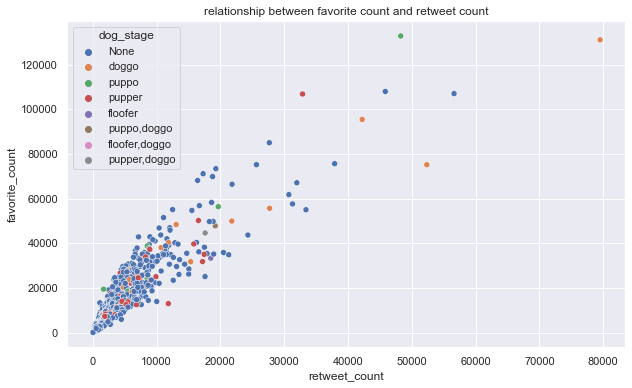

In [90]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=twitter_archive_master, x='retweet_count', y='favorite_count', hue='dog_stage')
plt.title('relationship between favorite count and retweet count');

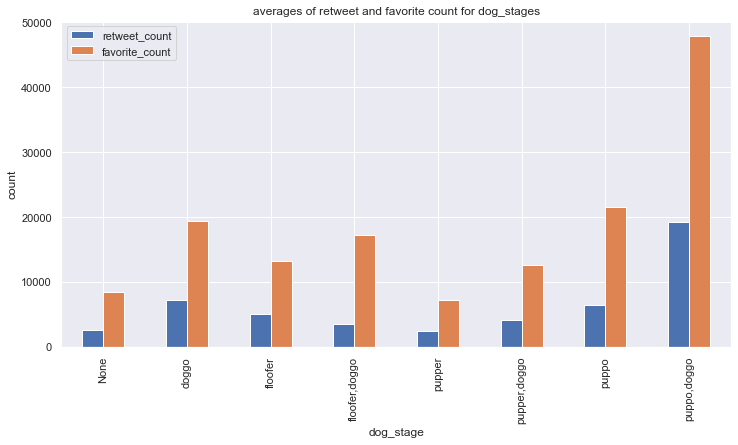

In [91]:
avg_count.plot(kind='bar', figsize=(12,6))
plt.ylabel('count')
plt.title('averages of retweet and favorite count for dog_stages');

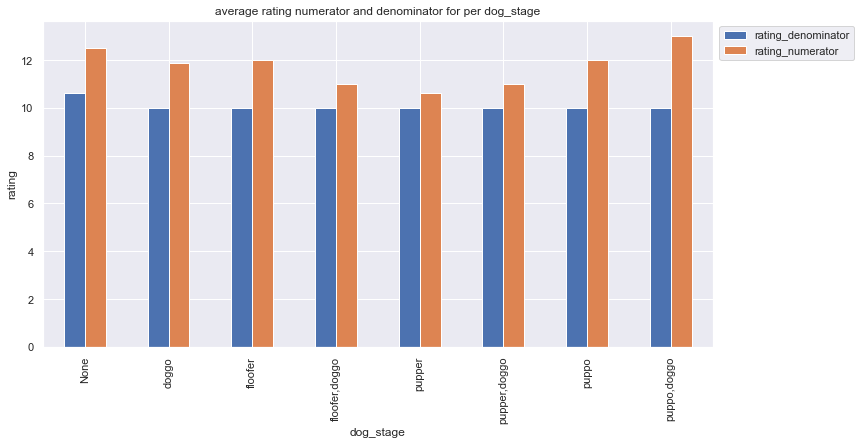

In [92]:
rating_avg.plot(kind='bar',figsize=(12,6)).legend(bbox_to_anchor=(1.22, 1))
plt.ylabel('rating')
plt.title('average rating numerator and denominator for per dog_stage');